In [61]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
stemmer = ps()
from nltk.stem.cistem import Cistem
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
pd.set_option("display.max_rows", None, "display.max_columns", None)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [1]:
#Unpickling dataframe 
object_df = pd.read_pickle("./unknown_makers_full.pkl")

NameError: name 'pd' is not defined

In [63]:
#Update this from the API script one last time- I think I missed the last few pages- currently missing 99 objects from website
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33318 entries, 0 to 0
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 33318 non-null  object
 1   collection         33318 non-null  object
 2   credit             33318 non-null  object
 3   culture            33318 non-null  object
 4   dating             33318 non-null  object
 5   datingYearFrom     33318 non-null  object
 6   datingYearTo       33318 non-null  object
 7   description        33318 non-null  object
 8   dimensions         33318 non-null  object
 9   edition            33318 non-null  object
 10  images             33318 non-null  object
 11  inscription        33318 non-null  object
 12  makers             33318 non-null  object
 13  medium             33318 non-null  object
 14  mediumTechnique    33318 non-null  object
 15  objectNumber       33318 non-null  object
 16  onView             33318 non-null  bool  
 1

In [64]:
#Turning a list into a df
def list_to_df(item_list):
    new_dict = {}
    for category in item_list:
        if not category in new_dict.keys():
            new_dict[category] = 1
        else:
            new_dict[category] +=1
    counts_df = pd.DataFrame([new_dict]).melt()
    counts_df.columns = ['Word', 'Word Count']
    sorted_df = counts_df.sort_values('Word Count', ascending = False)
    return sorted_df
        

In [60]:
#List to dictionary with count frequencies for wordcloud
def list_to_dict(item_list):
    new_dict = {}
    for category in item_list:
        if not category in new_dict.keys():
            new_dict[category] = 1
        else:
            new_dict[category] +=1
    return new_dict

In [48]:
#A function to get total numbers for a particular individual category, i.e. culture, dates, etc.
#Can handle list fields as well
def get_counts(original_df, category_name, new_name):
    if(isinstance(original_df[category_name].iloc[0], list)):
        mega_list = []
        for row in original_df[category_name]:
            item_list = row
            for item in row: 
                mega_list.append(item)
                mega_list.sort()
        new_dict = {}
        for category in mega_list:
            if not category in new_dict.keys():
                new_dict[category] = 1
            else:
                new_dict[category] +=1
        counts_df = pd.DataFrame([new_dict]).melt()

    else:
        counts = original_df.groupby([category_name]).size()
        counts_df = counts.to_frame().reset_index(category_name)
    counts_df.columns = [new_name, 'Object Count']
    sorted_df = counts_df.sort_values('Object Count', ascending = False)
    return sorted_df

In [49]:
#Get counts for the type of object
get_counts(object_df,'type', 'Object Type')

,Object Type,Object Count
20,Fashion,9521
45,Textiles,7718
8,Ceramics,4809
11,Costume Accessories,4671
10,Costume,4621
54,Works on Paper,3132
35,Metalwork,1956
12,Decorative Arts,1170
41,Prints,1035
27,Jewelry,851


In [50]:
#Get counts for each culture
get_counts(object_df,'culture', 'Culture Label')

,Culture Label,Object Count
15,American,7693
0,,3818
136,French,3511
87,Chinese,3163
121,English,2655
186,Japanese,2035
182,Italian,1642
150,Greek,855
142,German,628
173,Indian,579


In [51]:
#Get counts for medium type
get_counts(object_df,'medium', 'Medium Type')

,Medium Type,Object Count
528,silk,4873
174,cotton,2946
458,porcelain,1778
327,linen,1482
530,silver,1429
631,wool,1315
149,clay products,1280
259,gold,677
99,bronze,607
96,brass (alloy),562


In [52]:
#This takes our descriptions and tokenizes them into a list
def tokenize_stem_descriptions(df):
    tokens = []
    punct_list ={'-',':','&','|', "'s", '...', ',', '!','?', 'hi', 'thi', 'em', '”', '+', 'would', '’', 'wa', '(' ,')','[', "'",']', ';', '“', '<', '>','/em', '/', 'p', '/p', '*', '$', '@', '%', '^', '~', '.', '='}
    description_list = []
    for description in df['description'].dropna():
        description_list.append(description)
    for text in description_list:
        sublist = word_tokenize(text)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(str(token))
    tokens.sort()
    return tokens

In [53]:
tokens = tokenize_stem_descriptions(object_df)
#should pickle this
tokenized_df = list_to_df(tokens)

In [54]:
tokenized_df.to_pickle('./token_df.pkl')

In [40]:
token_df = pd.read_pickle('./token_df.pkl')

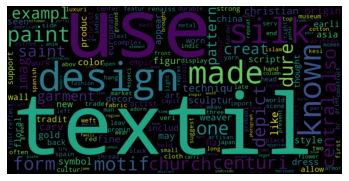

<Figure size 28800x16800 with 0 Axes>

In [ ]:
#Our first (very simple) data viz!
wordle_dict = list_to_dict(tokens)
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(wordle_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(24,14), dpi=1200)
plt.savefig('wordcloud_high_res.png', facecolor='k', bbox_inches='tight')
plt.show()
wordcloud.to_file('word_cloud.png')